In [2]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import mplfinance as mpf
import matplotlib.dates as mpl_dates
from datetime import datetime
import json
import urllib
import sys
from datetime import *
from tradingeconomics import glob
import ssl
from urllib.request import urlopen

In [3]:
te.login() # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

## Commodities performances by Group "Energy" - 2010 - 2020

In [3]:
def get_symbols(group_name):
    commodities_dict ={
    'energy':['CL1:COM','CO1:COM','NG1:COM','XB1:COM','HO1:COM', 'DL1:COM', 'MOB:COM','PNL:COM', 'UXA:COM', 'CMA:COM'],
    }

    return commodities_dict[group_name]

def getCmtName(symbol_list):
    name_list = []
    unit_list = []
    decimals_list = []
    linkAPI = f'https://api.tradingeconomics.com/markets/commodities?c={glob.apikey}'
    response = urlopen(linkAPI)
    code = response.getcode()
    webResults = json.loads(response.read().decode('utf-8'))
    maindf = pd.DataFrame(webResults)
    for symbol in symbol_list:
        symbol_name = maindf.query(f'Symbol == "{symbol}"')
        name_list.append(symbol_name['Name'].values)
        unit_list.append(symbol_name['unit'].values)
        decimals_list.append(symbol_name['decimals'].values)
    dict_map = {
            "name_list": [name_list],
            "unit_list": [unit_list],
            "decimals_list": [decimals_list]
            }
    return dict_map
    
def getHistoricalData(symbol_list, initDate, endDate):
    dataframe_list = []
    for symbol in symbol_list:
        dataframe_list.append(te.fetchMarkets(symbol = symbol, initDate = initDate, endDate = endDate, output_type='df'))
    return dataframe_list
    
        
def plot(dataframe_list, symbol_list, dict_map):
    plt.rcParams.update({'figure.autolayout': True})
    fig, axs = plt.subplots(len(symbol_list), 1, figsize=(15, 30))
    i = 0
    for dataframe in dataframe_list:
        axs[i].plot(dataframe['close'], label = dict_map['unit_list'][0][i])
        axs[i].set_title(f"{dict_map['name_list'][0][i]}", fontsize=20, fontweight='bold')
        legend = axs[i].legend(loc='lower left', shadow=True, fontsize='x-large')
        legend.get_frame().set_facecolor('C0')
        axs[i].grid()
        i += 1

def getCmtPerformanceEnergy(commodities_group, initDate, endDate):
    symbol_list = get_symbols(commodities_group)
    dataframe_list = getHistoricalData(symbol_list, initDate, endDate)
    dict_map = getCmtName(symbol_list)
    plot(dataframe_list, symbol_list, dict_map)


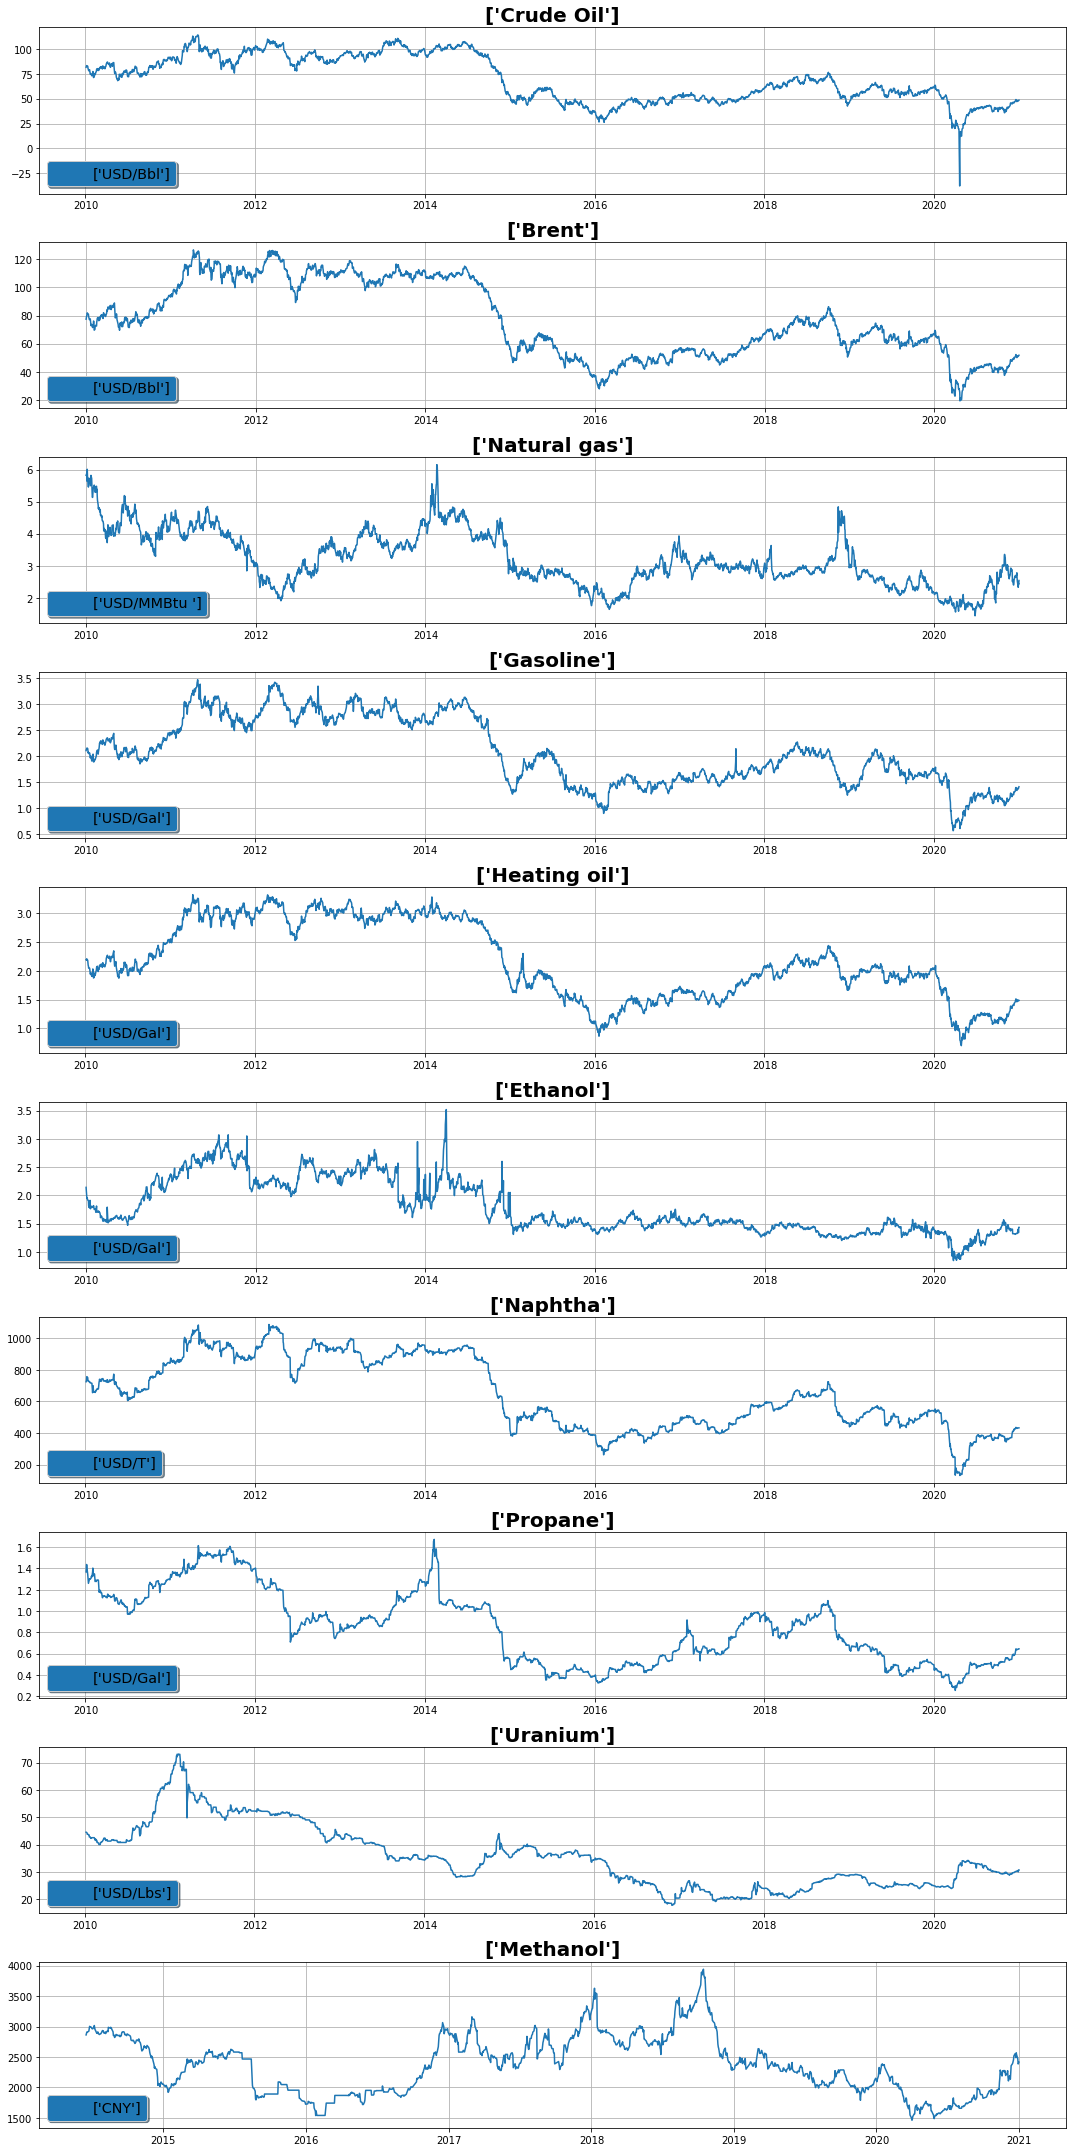

In [4]:
commodities_group = 'energy'
initDate = '2010-01-01'
endDate = '2020-12-31'
getCmtPerformanceEnergy(commodities_group, initDate, endDate)

In [ ]:
commodities_group = 'energy'
initDate = '2010-01-01'
endDate = '2020-12-31'
getCmtPerformanceEnergy(commodities_group, initDate, endDate)

In [ ]:
def get_moving_average(symbol, plot_type, total_days_interval):
#     symbol="AAPL:US"
#     total_days_interval = 180
    initDate = str((datetime.today() - timedelta(days=total_days_interval)).date())
    endDate = str((datetime.now() + timedelta(days=1)).date())
    df = te.fetchMarkets(symbol=symbol, initDate=initDate, endDate=endDate, output_type="df")
    stock_df = StockDataFrame.retype(df)
    stock_df
#     plt.style.use('bmh')
    
    def get_static_plot(df):
        plt.style.use('bmh')
        fig, ax = plt.subplots(figsize=(20,5))  # Create a figure and an axes.
        ax.plot(stock_df['close'], label='Close Price')  # Plot some data on the axes.
        ax.plot(stock_df['close_10_sma'], label='10 Days Moving Average')  # Plot some data on the axes.
        ax.plot(stock_df['close_50_sma'], label='50 Days Moving Average')  # Plot some data on the axes.

        ax.set_xlabel('Date')  # Add an x-label to the axes.
        ax.set_ylabel('')  # Add a y-label to the axes.
        ax.set_title("Moving Average ")  # Add a title to the axes.
        ax.legend(fontsize='x-large')  # Add a legend.
        
    def get_dynamic_plot(df):
        fig = pgo.Figure()
        fig.add_trace(pgo.Scatter(x=stock_df.index, y= stock_df['close'], line=dict(color='red', width= 1), name ='Close Price'))
        fig.add_trace(pgo.Scatter(x=stock_df.index, y= stock_df['close_10_sma'], line=dict(color='blue', width= 1), name ='10 Days Moving Average'))
        fig.add_trace(pgo.Scatter(x=stock_df.index, y= stock_df['close_50_sma'], line=dict(color='green', width= 1), name ='50 Days Moving Average'))
#         fig.add_trace(pgo.Scatter(x=stock_df.index, y= stock_df['adx'], line=dict(color='purple', width= 1), name ='ADX, 6 days SMA of DX'))
#         fig.add_trace(pgo.Scatter(x=stock_df.index, y= stock_df['adxr'], line=dict(color='black', width= 1), name ='ADXR, 6 days SMA of ADX'))
        # fig.add_trace(pgo.Scatter(x=df.index, y= df['lower band'], line=dict(color='green', width= 1), name ='Lower Band'))

        fig.add_trace(pgo.Candlestick(x = stock_df.index, open = stock_df['open'], high = stock_df['high'], low = stock_df['low'], close = stock_df['close'], name = symbol.upper() + ' Data'))

        fig.update_layout(title='Moving Average ' + symbol.upper(), yaxis_title='USD')

        fig.update_xaxes(rangeslider_visible = True,
                        rangeselector = dict(
                        buttons=list([           
                            dict(count=1, label='1 Month', step='month', stepmode='todate'),
                            dict(count=3, label='3 Month', step='month', stepmode='todate'),
                            dict(count=5, label='5 Month', step='month', stepmode='todate'),
                            dict(count=7, label='7 Month', step='month', stepmode='todate'),
                            dict(label='1 Year', step='all')
                        ])))
        fig.update_layout(
            autosize=True,
            height=700,
            margin=dict(
                l=50,
                r=50,
                b=100,
                t=100
            )
        )

        fig.show()

        
        
    
    if plot_type == 'static':
        get_static_plot(stock_df)
        
    if plot_type == 'dynamic':
        get_dynamic_plot(stock_df)